In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cellpose import io, models, plot, utils # Added utils for outline plotting
import os
from skimage import measure, io
import warnings



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [2]:
df = pd.read_csv('../data/BBBC021_v1_image.csv')
df

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
0,4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,Week4/Week4_27481,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,Week4/Week4_27481,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
1,4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,Week4/Week4_27481,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,Week4/Week4_27481,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
2,4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,Week4/Week4_27481,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,Week4/Week4_27481,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
3,4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,Week4/Week4_27481,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,Week4/Week4_27481,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,Week4/Week4_27521,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,Week4/Week4_27521,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,Week4/Week4_27521,Week4_27521,G10,2,5-fluorouracil,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,9,3560,Week9_090907_F11_s4_w19580FF4D-DC3D-4BD0-93FE-...,Week9/Week9_39301,Week9_090907_F11_s4_w2DC65EC6F-BDCA-4B05-B243-...,Week9/Week9_39301,Week9_090907_F11_s4_w45699A0F4-9AEE-4CD4-8973-...,Week9/Week9_39301,Week9_39301,F11,3,DMSO,0.000
13196,9,3597,Week9_090907_G11_s1_w1EDE534D2-FCEE-4F92-A30B-...,Week9/Week9_39301,Week9_090907_G11_s1_w26A22E27F-6A81-43F5-9587-...,Week9/Week9_39301,Week9_090907_G11_s1_w4554A2BF7-0D53-4D27-BF92-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000
13197,9,3598,Week9_090907_G11_s2_w10B010F39-3B4B-4DCB-8E34-...,Week9/Week9_39301,Week9_090907_G11_s2_w2720AC778-3F85-4293-8D75-...,Week9/Week9_39301,Week9_090907_G11_s2_w49B290958-BCF2-4DDD-B0E9-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000
13198,9,3599,Week9_090907_G11_s3_w10394282C-6D3D-4E0E-9FA3-...,Week9/Week9_39301,Week9_090907_G11_s3_w24C59DB62-E99B-4284-BAD2-...,Week9/Week9_39301,Week9_090907_G11_s3_w471FE25C8-2477-456F-9D74-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000


In [3]:
df["Image_Metadata_Compound"].describe()

count     13200
unique      113
top       taxol
freq       1416
Name: Image_Metadata_Compound, dtype: object

In [4]:
df["Image_Metadata_Compound"].unique()

np.random.seed(42)
chosen_compounds = np.random.choice(df["Image_Metadata_Compound"].unique(), 25)
chosen_compounds

array(['AZ-I', 'leupeptin', 'Y-27632', 'calpain inhibitor 2 (ALLM)',
       'AZ-M', 'puromycin', 'neomycin', 'Cdk1 inhibitor III', 'AZ-I',
       'staurosporine', 'trichostatin', 'rapamycin', 'rapamycin',
       'tunicamycin', 'AZ-B', 'AZ-J', 'chloramphenicol', 'AG-1478',
       'Cdk1/2 inhibitor (NU6102)', 'LY-294002', 'acyclovir',
       'tunicamycin', 'AZ-N', 'cytochalasin D', 'epothilone B'],
      dtype=object)

In [5]:
# Make a smaller dataframe only using the randomly selected compounds

df_small = df[df["Image_Metadata_Compound"].isin(chosen_compounds)] 
# save the smaller dataframe to a new CSV file
df_small.to_csv('../data/BBBC021_v1_image_smaller.csv', index=False)

In [ ]:
# --- Configuration ---
# <<< PLEASE SPECIFY THE PATH TO YOUR .TIF FILE HERE >>>
def plot_masks(dir_path = "../data/Week1/", image_name=None, save_plot_path=None):
    image_path = os.path.join(dir_path, image_name) # Construct the full path to the image file

    use_gpu = True
    diameter = None # Let cellpose estimate diameter
    # --- File Check ---
    if not os.path.exists(image_path):
        print(f"Error: File not found at '{image_path}'")
        print("Please update the 'image_path' variable with the correct path to your .tif file.")
        raise FileNotFoundError(f"File not found: {image_path}")
    # --- End File Check ---

    print(f"Loading image: {image_path}")
    img = io.imread(image_path)

    if img is None:
        print(f"Error: Could not load the image file '{image_path}'. It might be corrupted or in an unsupported format.")
    else:
        print(f"Image loaded successfully. Shape: {img.shape}, dtype: {img.dtype}, Range: {img.min()}-{img.max()}")

        model = models.CellposeModel(gpu=use_gpu)

        print("Running segmentation...")
        # Run evaluation with specified channels and diameter
        # model.eval returns masks, flows, styles
        masks, flows, styles = model.eval(img,
                                        diameter=diameter)

        num_masks = masks.max() # Get the number of unique masks found (highest integer ID)
        print(f"Segmentation complete. Found {num_masks} masks.")

        # --- Option 1: Use plot.show_segmentation ---
        print("\nGenerating visualization using plot.show_segmentation...")
        try:
            fig = plt.figure(figsize=(12, 7)) # Create a figure

            plot.show_segmentation(fig, img, masks, flows[0])

            plt.tight_layout() # Adjusts plot parameters for a tight layout
            # plt.suptitle(f"Cellpose Segmentation: {os.path.basename(image_path)}") # Add a title above subplots
            if save_plot_path:
                plt.savefig(save_plot_path, dpi=600, bbox_inches='tight')
                plt.show()
            else:
                plt.show()
        except Exception as e:
            print(f"Error during plot.show_segmentation: {e}")
            print("Proceeding to manual overlay method.")

Loading image: ../data/Week1/Week1_22123/Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400.tif
Image loaded successfully. Shape: (1024, 1280), dtype: uint16, Range: 208-7920
Running segmentation...
Segmentation complete. Found 279 masks.

Generating visualization using plot.show_segmentation...


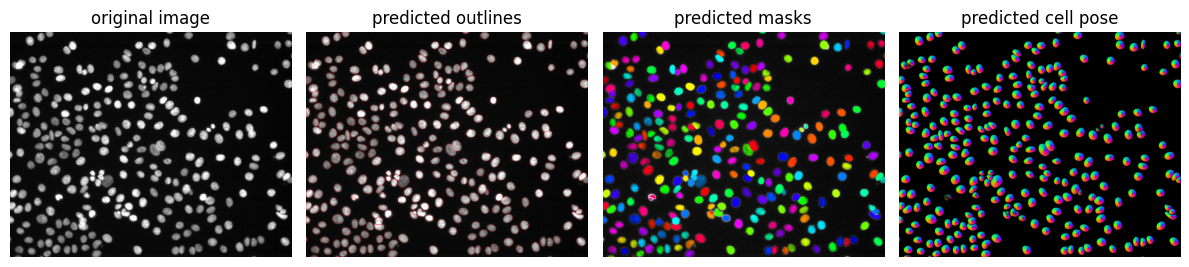

In [10]:
img_path = "Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400.tif"
plot_masks(dir_path="../data/Week1/Week1_22123/", image_name=img_path, save_plot_path="nuclei_for_paper.png")

Loading image: ../data/Week1/Week1_22123/Week1_150607_B08_s3_w4986E26D2-53E1-4C38-851C-422DEDB00408.tif
Image loaded successfully. Shape: (1024, 1280), dtype: uint16, Range: 304-12480
Running segmentation...
Segmentation complete. Found 267 masks.

Generating visualization using plot.show_segmentation...


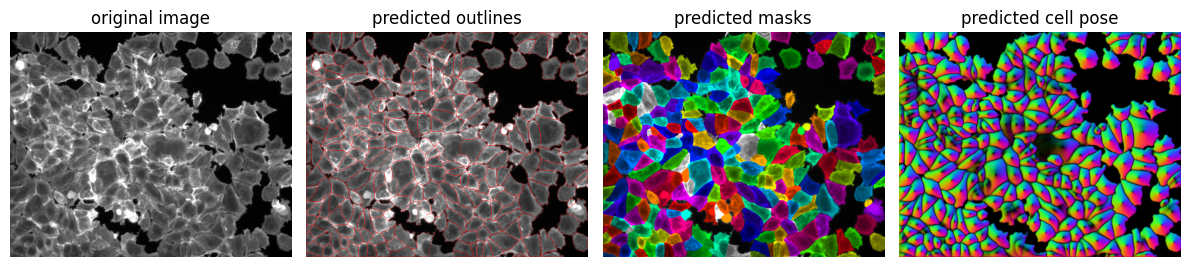

In [11]:
img_path = "Week1_150607_B08_s3_w4986E26D2-53E1-4C38-851C-422DEDB00408.tif"
plot_masks(dir_path="../data/Week1/Week1_22123/", image_name=img_path, save_plot_path="actin_for_paper.png")

In [9]:
# Analyze npy array

# Import necessary libraries
import numpy as np
import pandas as pd


# --- Configuration ---
# <<< PLEASE SPECIFY THE PATH TO YOUR _seg.npy FILE HERE >>>
dirpath_path = "/home/tomasjelinek/GITHUB/quant_microscopy/data/Week1/Week1_experimental"
img_path = "Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400.tif"
npy_path = os.path.join(dirpath_path, "Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400_seg.npy") # Construct the full path to the segmentation file
image_path = os.path.join(dirpath_path, img_path) # Construct the full path to the image file


# If your original image is multi-channel, specify the channel to use
# for intensity measurements (0-based index).
# Set to None if the image is grayscale or single-channel.
intensity_channel = None # e.g., 0 for first channel, 1 for second, etc.
# --- End Configuration ---

# --- Input Validation ---
if not os.path.exists(npy_path):
    print(f"Error: Segmentation file not found at '{npy_path}'")
    print("Please update the 'npy_path' variable.")
    raise FileNotFoundError(f"Segmentation file not found: {npy_path}")

if not os.path.exists(image_path):
    print(f"Error: Original image file not found at '{image_path}'")
    print("Please update the 'image_path' variable.")
    raise FileNotFoundError(f"Original image file not found: {image_path}")

print(f"Loading segmentation data from: {npy_path}")
print(f"Loading original image from: {image_path}")

# Load the segmentation data (_seg.npy)
# allow_pickle=True is necessary for loading Cellpose .npy files
seg_data = np.load(npy_path, allow_pickle=True).item()
masks = seg_data['masks'] # Extract the mask array

# Load the original image
original_img = io.imread(image_path)

print(f"Masks loaded. Shape: {masks.shape}, Max mask ID: {masks.max()}")
print(f"Original image loaded. Shape: {original_img.shape}, dtype: {original_img.dtype}")

# --- Prepare Intensity Image ---
# Select the specified channel if the image is multi-channel
intensity_image = original_img
if original_img.ndim > 2 and intensity_channel is not None:
    if intensity_channel < original_img.shape[-1]:
        intensity_image = original_img[..., intensity_channel]
        print(f"Using channel {intensity_channel} for intensity measurements.")
    else:
        print(f"Error: Specified intensity_channel ({intensity_channel}) is out of bounds for image shape {original_img.shape}.")
        exit()
elif original_img.ndim > 2 and intensity_channel is None:
    # Default to first channel or grayscale conversion if not specified for multi-channel
    intensity_image = original_img[..., 0]
    print(f"Warning: Multi-channel image detected, but no intensity_channel specified. Using channel 0 for intensity measurements.")

# Ensure intensity image and masks have compatible shapes (ignoring channels for intensity image)
if masks.shape != intensity_image.shape:
    print(f"Error: Mask shape {masks.shape} and intensity image shape {intensity_image.shape} (after channel selection) do not match.")
    raise ValueError(f"Mask shape {masks.shape} and intensity image shape {intensity_image.shape} do not match.")


print("Extracting features using skimage.measure.regionprops_table...")

properties_to_measure = [
    'label', # The integer ID of the mask
    'area', # Number of pixels in the mask
    'perimeter',
    'eccentricity', # Measure of elongation (0=circle, 1=line)
    'equivalent_diameter', # Diameter of a circle with the same area
    'major_axis_length', # Length of the major axis of the ellipse with the same normalized second central moments
    'minor_axis_length', # Length of the minor axis
    'solidity', # Ratio of pixels in the region to pixels of the convex hull image (compactness measure)
    'orientation', # Angle between the 0th axis (rows) and the major axis of the ellipse
    # Intensity properties (require intensity_image)
    'mean_intensity',
    'max_intensity',
    'min_intensity',
]

# Use regionprops_table to calculate features for all masks efficiently
# It requires the label image (masks) and the intensity image
# Note: regionprops automatically ignores the background label (0)
try:
    # Suppress specific warnings from regionprops if necessary (e.g., about perimeter calculation)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        props_table = measure.regionprops_table(
            label_image=masks,
            intensity_image=intensity_image,
            properties=properties_to_measure
        )
        # Convert the resulting dictionary to a Pandas DataFrame
        features_df = pd.DataFrame(props_table)
        print(f"Successfully extracted {len(features_df)} regions/masks.")

except Exception as e:
    print(f"An error occurred during feature extraction with regionprops_table: {e}")
    exit()


# --- Calculate Additional Features (Manual) ---
print("Calculating additional features (Circularity, Intensity Std Dev)...")

# Calculate Circularity (Form Factor): 4 * pi * Area / Perimeter^2
# Handle potential division by zero if perimeter is 0
features_df['circularity'] = 4 * np.pi * features_df['area'] / (features_df['perimeter']**2 + 1e-6) # Add small epsilon to avoid division by zero

# Calculate Standard Deviation of Intensity
# regionprops_table doesn't directly calculate std dev, so we do it manually
intensity_std_devs = []
regions = measure.regionprops(masks, intensity_image=intensity_image) # Get region objects again
for region in regions:
    # Extract pixel coordinates for the current region
    coords = region.coords
    # Get intensity values for these pixels
    region_intensities = intensity_image[coords[:, 0], coords[:, 1]] # Indexing for 2D
    # Calculate standard deviation
    intensity_std_devs.append(np.std(region_intensities))

# Add the standard deviation list as a new column to the DataFrame
# Ensure the length matches the number of regions found
if len(intensity_std_devs) == len(features_df):
    features_df['intensity_std_dev'] = intensity_std_devs
else:
     print(f"Warning: Mismatch between number of regions ({len(features_df)}) and calculated std devs ({len(intensity_std_devs)}). Skipping std dev column.")


# --- Display Results ---
print("\nFeature extraction complete. DataFrame head:")
print(features_df.head())

print("\nDataFrame Info:")
features_df.info()

print("\nDataFrame Description (Statistics):")
print(features_df.describe())

# --- Optional: Save DataFrame ---
# output_csv_path = os.path.splitext(npy_path)[0] + "_features.csv"
# features_df.to_csv(output_csv_path, index=False)
# print(f"\nFeatures saved to: {output_csv_path}")
# --- End Optional Save ---

Loading segmentation data from: /home/tomasjelinek/GITHUB/quant_microscopy/data/Week1/Week1_experimental/Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400_seg.npy
Loading original image from: /home/tomasjelinek/GITHUB/quant_microscopy/data/Week1/Week1_experimental/Week1_150607_B08_s3_w1E1174621-33AA-42EF-B542-15C80A8D4400.tif
Masks loaded. Shape: (1024, 1280), Max mask ID: 279
Original image loaded. Shape: (1024, 1280), dtype: uint16
Extracting features using skimage.measure.regionprops_table...
Successfully extracted 279 regions/masks.
Calculating additional features (Circularity, Intensity Std Dev)...

Feature extraction complete. DataFrame head:
   label    area   perimeter  eccentricity  equivalent_diameter  \
0      1   699.0  101.941125      0.710555            29.832775   
1      2   169.0   63.213203      0.956856            14.668929   
2      3   995.0  117.154329      0.571919            35.593164   
3      4  1269.0  132.568542      0.562051            40.196281   